### **Classic Start**

Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Load databases

In [3]:
demo_phq = pd.read_csv('DEMO_PHQ.csv')

pag_hei = pd.read_csv('PAG_HEI.csv')

Take a look on the information in each database

In [4]:
demo_phq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [5]:
demo_phq.head(5)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [6]:
pag_hei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [7]:
pag_hei.head(5)

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


Merge databases considering the SEQN number

In [8]:
merged_data = pd.merge(demo_phq, pag_hei)

In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

In [10]:
merged_data.head(5)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


### **Data Handling**

Replace values that match categories without information for missing values

In [11]:
replace_map = {
  "DPQ010": {7: np.nan, 9: np.nan},
  "DPQ020": {7: np.nan, 9: np.nan},
  "DPQ030": {7: np.nan, 9: np.nan},
  "DPQ040": {7: np.nan, 9: np.nan},
  "DPQ050": {7: np.nan, 9: np.nan},
  "DPQ060": {7: np.nan, 9: np.nan},
  "DPQ070": {7: np.nan, 9: np.nan},
  "DPQ080": {7: np.nan, 9: np.nan},
  "DPQ090": {7: np.nan, 9: np.nan},
  "DMDEDUC": {7: np.nan, 9: np.nan},
  "INDFMINC": {77: np.nan, 99: np.nan}
}

df1 = merged_data.replace(replace_map)

Missing values analysis

In [12]:
df1.isna().sum().sort_values(ascending=False)

DPQ080                      507
DPQ010                      507
DPQ030                      505
DPQ020                      503
DPQ040                      503
DPQ060                      503
DPQ050                      502
DPQ070                      502
DPQ090                      500
HEI2015C5_WHOLEGRAIN        274
HEI2015C3_TOTALFRUIT        274
HEI2015C4_WHOLEFRUIT        274
HEI2015_TOTAL_SCORE         274
HEI2015C6_TOTALDAIRY        274
HEI2015C7_TOTPROT           274
HEI2015C1_TOTALVEG          274
HEI2015C2_GREEN_AND_BEAN    274
HEI2015C11_REFINEDGRAIN     274
HEI2015C10_SODIUM           274
HEI2015C9_FATTYACID         274
HEI2015C12_SFAT             274
HEI2015C13_ADDSUG           274
HEI2015C8_SEAPLANT_PROT     274
INDFMINC                    160
DMDEDUC                       8
SEQN                          0
ADHERENCE                     0
RIDRETH1                      0
RIDAGEYR                      0
RIAGENDR                      0
PAG_MINW                      0
dtype: i

In [13]:
100*df1.isna().sum().sort_values(ascending=False)/df1.shape[0]

DPQ080                      9.505062
DPQ010                      9.505062
DPQ030                      9.467567
DPQ020                      9.430071
DPQ040                      9.430071
DPQ060                      9.430071
DPQ050                      9.411324
DPQ070                      9.411324
DPQ090                      9.373828
HEI2015C5_WHOLEGRAIN        5.136858
HEI2015C3_TOTALFRUIT        5.136858
HEI2015C4_WHOLEFRUIT        5.136858
HEI2015_TOTAL_SCORE         5.136858
HEI2015C6_TOTALDAIRY        5.136858
HEI2015C7_TOTPROT           5.136858
HEI2015C1_TOTALVEG          5.136858
HEI2015C2_GREEN_AND_BEAN    5.136858
HEI2015C11_REFINEDGRAIN     5.136858
HEI2015C10_SODIUM           5.136858
HEI2015C9_FATTYACID         5.136858
HEI2015C12_SFAT             5.136858
HEI2015C13_ADDSUG           5.136858
HEI2015C8_SEAPLANT_PROT     5.136858
INDFMINC                    2.999625
DMDEDUC                     0.149981
SEQN                        0.000000
ADHERENCE                   0.000000
R

As the missing percentage is below 10% for all variables, we will not do any treatment for missing cases.

Compute the PHQ-9 Score

In [14]:
df1['PHQ9_TOTAL_SCORE'] = df1[['DPQ010', 
                                'DPQ020', 
                                'DPQ030', 
                                'DPQ040', 
                                'DPQ050', 
                                'DPQ060', 
                                'DPQ070', 
                                'DPQ080', 
                                'DPQ090']].sum(axis = 'columns', skipna = False)

In [15]:
df1['PHQ9_TOTAL_SCORE'].describe()

count    4799.000000
mean        2.732236
std         3.727676
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        27.000000
Name: PHQ9_TOTAL_SCORE, dtype: float64

Classification of scores according to the literature

In [16]:
PHQ9_classes = [
  (df1['PHQ9_TOTAL_SCORE'].isna()),
  (df1['PHQ9_TOTAL_SCORE'] <= 5),
  (df1['PHQ9_TOTAL_SCORE'] > 5) & (df1['PHQ9_TOTAL_SCORE'] <= 9),
  (df1['PHQ9_TOTAL_SCORE'] > 9) & (df1['PHQ9_TOTAL_SCORE'] <= 14),
  (df1['PHQ9_TOTAL_SCORE'] > 14) & (df1['PHQ9_TOTAL_SCORE'] <= 19),
  (df1['PHQ9_TOTAL_SCORE'] > 19)
    ]
values = [np.nan, 0, 1, 2, 3, 4]

df1['PHQ9_CLASSIFICATION'] = np.select(PHQ9_classes, values)

df1[['PHQ9_CLASSIFICATION']].value_counts(sort = False)

PHQ9_CLASSIFICATION
0.0                    4013
1.0                     489
2.0                     201
3.0                      73
4.0                      23
dtype: int64

### **Univariate Exploratory Data Analysis**

Selecting numeric variables

In [17]:
numeric_variable = [
    'PHQ9_TOTAL_SCORE',
    'RIDAGEYR',
    'INDFMINC',
    'PAG_MINW',
    'HEI2015C1_TOTALVEG',
    'HEI2015C2_GREEN_AND_BEAN',
    'HEI2015C3_TOTALFRUIT',
    'HEI2015C4_WHOLEFRUIT',
    'HEI2015C5_WHOLEGRAIN',
    'HEI2015C6_TOTALDAIRY',
    'HEI2015C7_TOTPROT',
    'HEI2015C8_SEAPLANT_PROT',
    'HEI2015C9_FATTYACID',
    'HEI2015C10_SODIUM',
    'HEI2015C11_REFINEDGRAIN',
    'HEI2015C12_SFAT',
    'HEI2015C13_ADDSUG',
    'HEI2015_TOTAL_SCORE',
]

Selecting categorical variables and defining labels

In [18]:

categorical_variable = [
    'RIAGENDR',
    'RIDRETH1',
    'DMDEDUC',
    'ADHERENCE',
    'PHQ9_CLASSIFICATION'
]

label_cat_var = {
  'RIAGENDR': {1: 'Male', 2: 'Female'},
  'RIDRETH1': {1: 'Non-hispanic \n white', 2: 'Non-hispanic \n black',
               3: 'Mexican \n american', 4: 'Other', 5: 'Other \n hispanic'},
  'DMDEDUC': {1: '< 9th \n grade', 2: '9-12th \n grade', 3: 'High \n school',
              4: 'Uncomplete \n higher education', 5: 'Complete \n higher education'},
  'ADHERENCE': {1: 'Low', 2: 'Adequate', 3: 'Above'},
  'PHQ9_CLASSIFICATION': {0: 'None-minimal', 1: 'Mild',
               2: 'Moderate', 3: 'Moderately \n severe', 4: 'Severe'}
}

### **Numeric Variables Analysis**

In [19]:
df1[numeric_variable].describe(percentiles = [.01, .25, .5, .75, .99]).round(2)

,PHQ9_TOTAL_SCORE,RIDAGEYR,INDFMINC,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4799.00,5334.00,5174.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00
mean,2.73,45.09,6.92,471.77,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,3.73,20.15,3.14,780.35,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,0.00,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
1%,0.00,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.81,0.00,0.00,0.00,0.00,0.00,0.00,24.68
25%,0.00,27.00,4.00,35.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,1.00,43.00,7.00,210.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,4.00,62.00,10.00,568.93,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
99%,17.00,85.00,12.00,3672.06,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86
max,27.00,85.00,13.00,10777.83,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


Considering that a week has a maximum of 168 hours (10,080 minutes), the maximum value of 10,777 minutes in PAG_MINW (time of moderate aerobic activity) is an outlier. Based on this, we will truncate this variable to 3,000 min (50 hours per week).

In [20]:
df1['PAG_MINW_trunc'] = np.where(df1['PAG_MINW'] > 3000, 3000, df1['PAG_MINW'])
df1[['PAG_MINW', 'PAG_MINW_trunc']].describe(percentiles = [.01, .25, .5, .75, .99]).round(2)

,PAG_MINW,PAG_MINW_trunc
count,5334.00,5334.00
mean,471.77,446.88
std,780.35,628.18
min,0.00,0.00
1%,0.00,0.00
25%,35.00,35.00
50%,210.00,210.00
75%,568.93,568.93
99%,3672.06,3000.00
max,10777.83,3000.00


Replacing 'PAG_MINW' in 'numeric_variable' for 'PAG_MINW_trunc':

In [21]:
for i in range(len(numeric_variable)):
    if numeric_variable[i] == 'PAG_MINW':
        numeric_variable[i] = 'PAG_MINW_trunc'

print(numeric_variable)


['PHQ9_TOTAL_SCORE', 'RIDAGEYR', 'INDFMINC', 'PAG_MINW_trunc', 'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']


Construction of Histograms

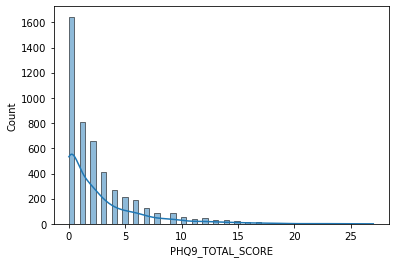

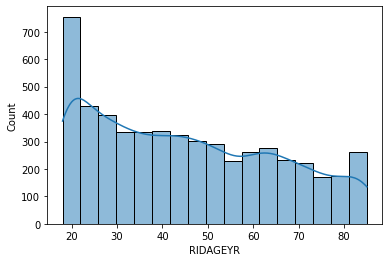

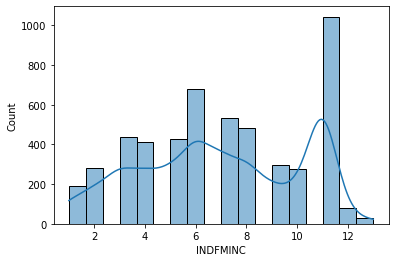

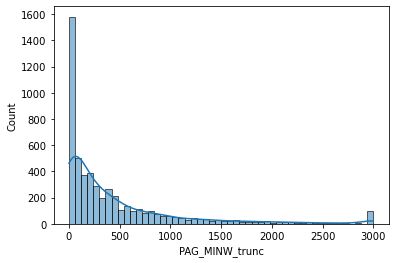

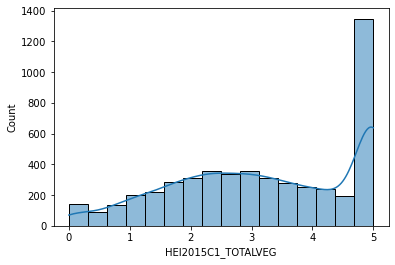

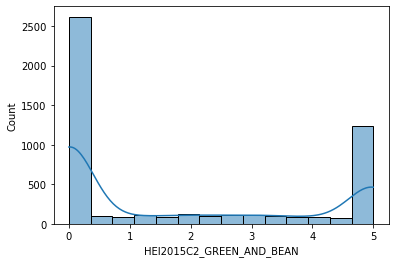

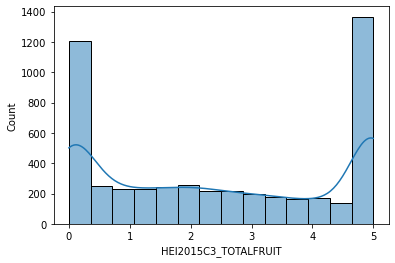

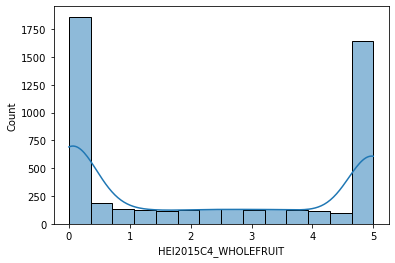

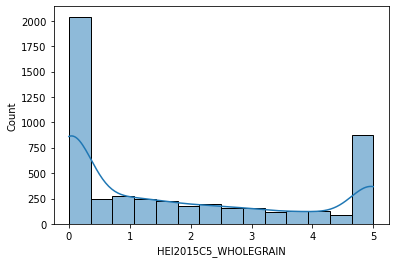

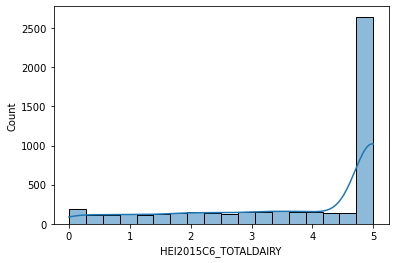

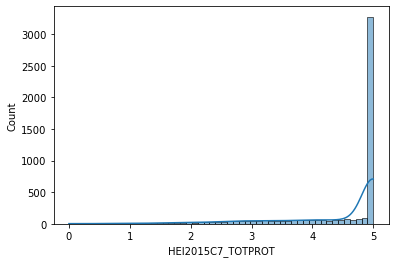

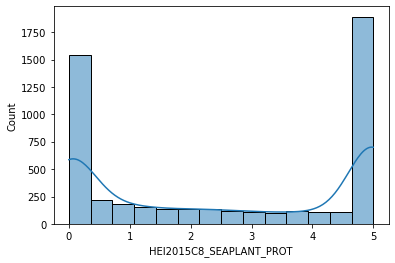

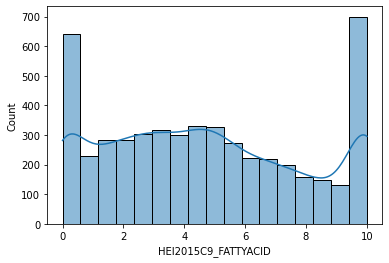

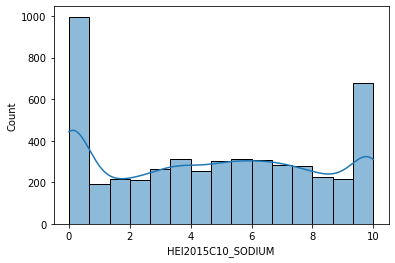

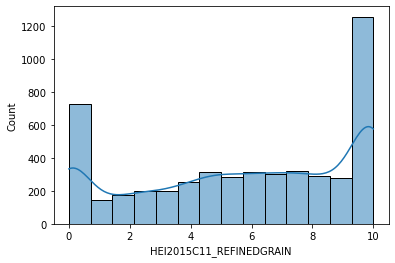

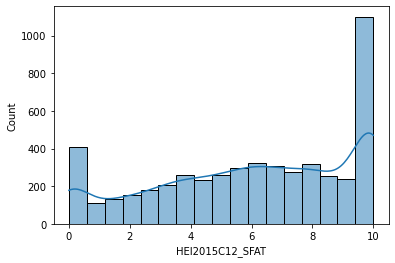

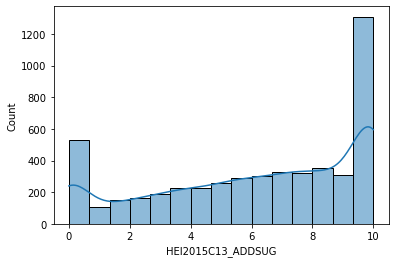

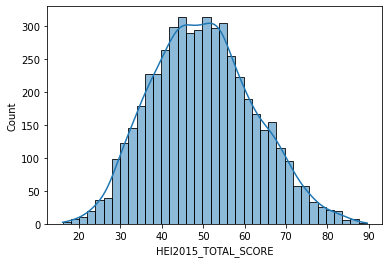

In [22]:
for var in numeric_variable:
  sns.histplot(df1[var], kde=True)
  plt.show()

Note on histograms:
- PHQ-9 Score had a positively skewed distribution. It means that most of the sample has a low probability of presenting a depressive condition.
- Physical Activity Guideline had also positively skewed distribution. It means that most of the sample practices moderate-vigorous activity for a short time each week.
- Healthy eating indices show, in general, bimodal distributions that are focus on the extremes (minimum and maximum). Exceptions: vegetables (25% of the sample is concentrated in the maximum index) and proteins (75% is concentrated in the maximum index).
- the total score of the healthy eating index follows a normal distribution.

### **Categorical Variables Analysis**

Evaluation of aggregated results by categories and normalized

In [23]:
df1[categorical_variable].agg(pd.Series.value_counts, normalize=True).fillna(0)

,RIAGENDR,RIDRETH1,DMDEDUC,ADHERENCE,PHQ9_CLASSIFICATION
0.0,0.000000,0.000000,0.000000,0.000000,0.836216
1.0,0.480127,0.212411,0.116035,0.431946,0.101896
2.0,0.519873,0.030746,0.175742,0.156355,0.041884
3.0,0.000000,0.471691,0.250657,0.411699,0.015212
4.0,0.000000,0.243720,0.281262,0.000000,0.004793
5.0,0.000000,0.041432,0.176305,0.000000,0.000000


Construction of bar charts

In [24]:
def bar_chart_cat_var (data, variable):
    (data[[variable]]
     .value_counts(normalize = True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x = variable, y = "Proportion"))
    plt.ylim(0, 1)
    plt.show()

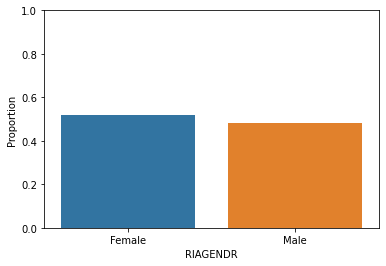

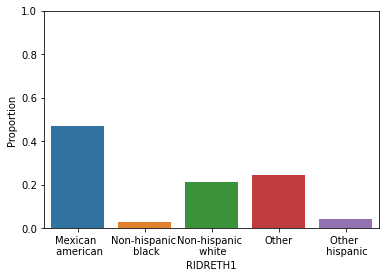

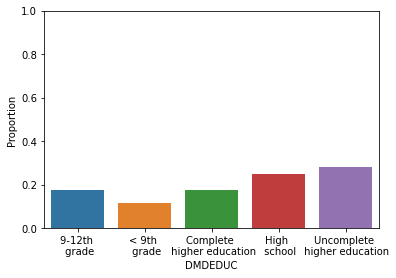

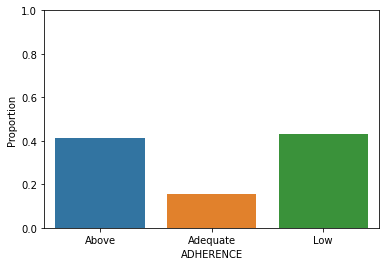

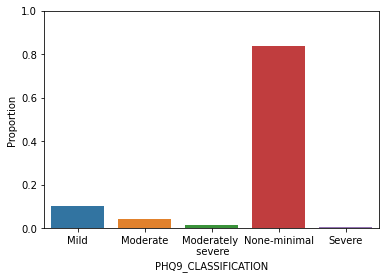

In [25]:
for var in categorical_variable:
    bar_chart_cat_var(df1.replace(label_cat_var), var)
  

Notes on the analysis of categorical variables:
- 47% os the interviewees are "Mexican american". "Non-hispanic blacks" and "other Hispanics" make up less than 5% of responses and could be added to the "Other" category. We would then be left with 3 categories: "Non-hispanic white", "Mexican american" and "other".
- Balanced distribution among levels of education.
- Adherence showed a bimodal behavior: 43% with low adherence and 41% with above adherence.
- 81% of interviewees have minimal depression or have no depression. The unbalanced data set can be a problem.

Changing the variable RIDRETH1 to hold the 3 categories (non-hispanic white, Mexican american, other)

In [26]:
df1['RIDRETH1'] = df1['RIDRETH1'].replace([2, 5], 4)
df1[['RIDRETH1']].value_counts(sort = False)

RIDRETH1
1           1133
3           2516
4           1685
dtype: int64

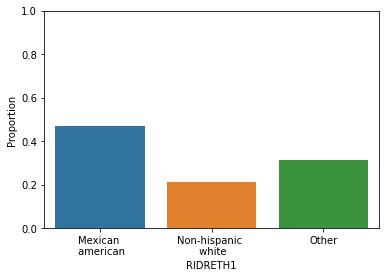

In [27]:
bar_chart_cat_var(df1.replace(label_cat_var), 'RIDRETH1')

### **Bivariate Analysis**

**Analysis of the distribution of numerical variables grouped by PHQ-9 test categories**

In [28]:
for var in numeric_variable:
    if var == 'PHQ9_TOTAL_SCORE':
        continue

    print(var)
    print(df1.groupby('PHQ9_CLASSIFICATION')[var].describe().round(2))

RIDAGEYR
                      count   mean    std   min   25%   50%   75%   max
PHQ9_CLASSIFICATION                                                    
0.0                  4013.0  44.94  19.99  18.0  27.0  42.0  62.0  85.0
1.0                   489.0  43.70  19.67  18.0  26.0  41.0  59.0  85.0
2.0                   201.0  44.42  18.02  18.0  27.0  45.0  57.0  85.0
3.0                    73.0  44.08  17.60  18.0  29.0  46.0  56.0  85.0
4.0                    23.0  42.35  13.24  18.0  32.5  43.0  53.0  64.0
INDFMINC
                      count  mean   std  min  25%  50%   75%   max
PHQ9_CLASSIFICATION                                               
0.0                  3923.0  7.14  3.11  1.0  5.0  7.0  10.0  13.0
1.0                   466.0  6.47  3.09  1.0  4.0  6.0   9.0  13.0
2.0                   198.0  5.67  3.30  1.0  3.0  5.0   8.0  13.0
3.0                    71.0  5.23  2.80  1.0  3.0  5.0   7.0  12.0
4.0                    22.0  4.50  2.82  1.0  3.0  3.0   6.0  12.0
PAG_MINW_

Defining a function to create boxplot graphs

In [29]:
def graph_boxplot(data, variable, label):
    
    if label == "": 
        label = variable
    
    sns.boxplot(x="PHQ9_CLASSIFICATION", y=variable, data=data.replace(label_cat_var))
    plt.ylabel(label)
    plt.show()

Plot boxplot graphs of the numeric variables

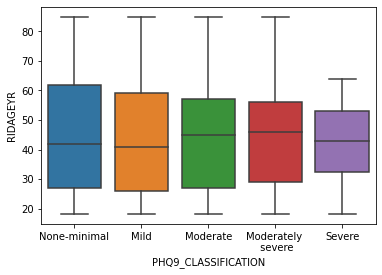

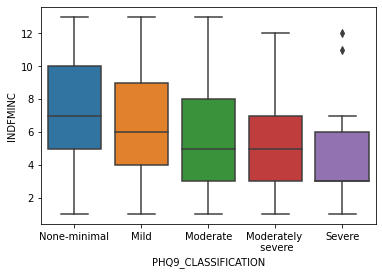

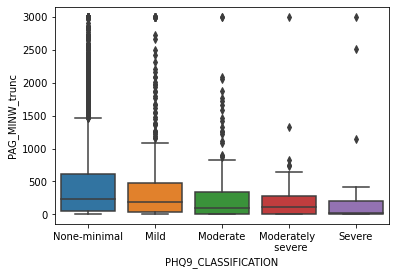

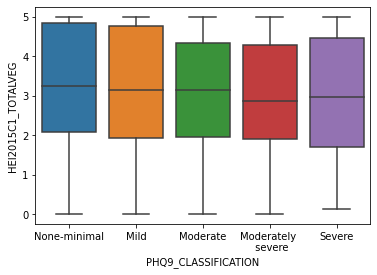

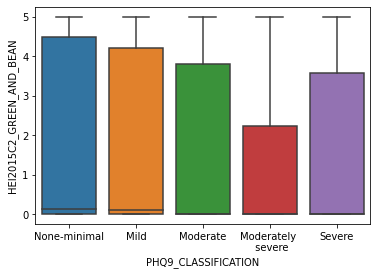

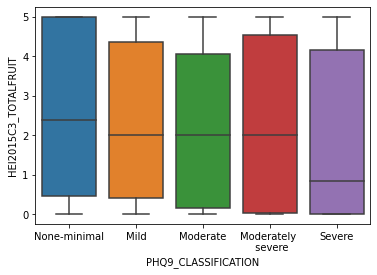

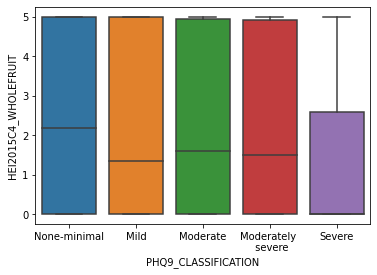

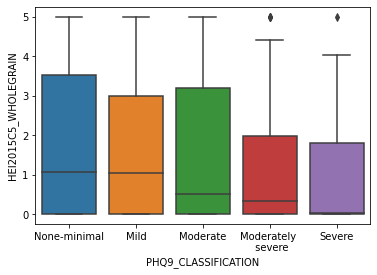

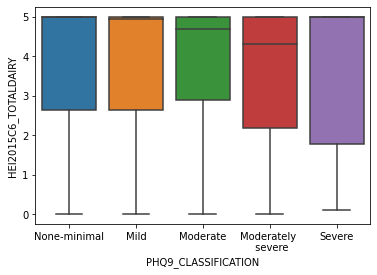

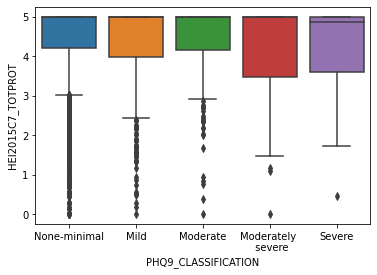

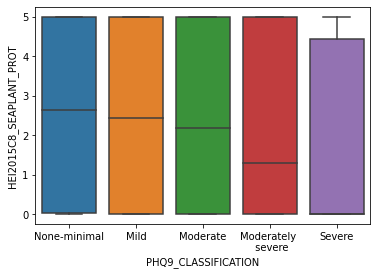

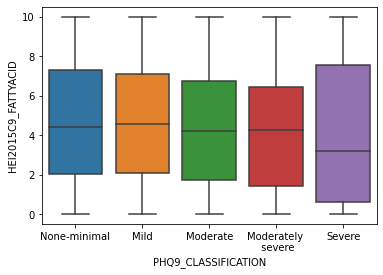

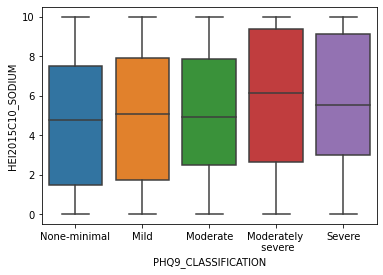

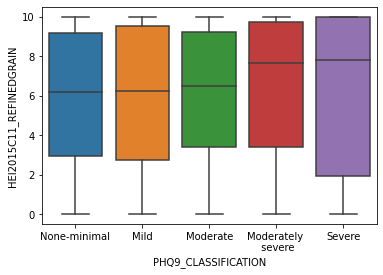

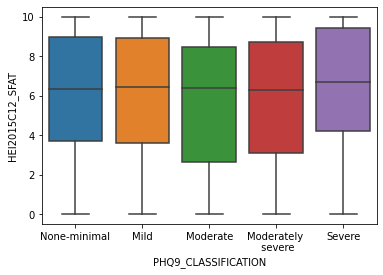

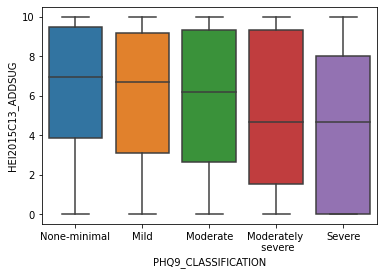

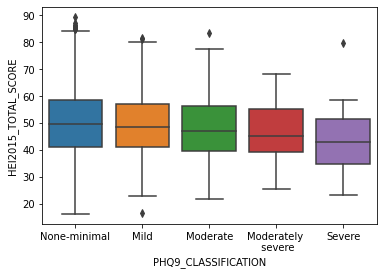

In [30]:
for var in numeric_variable:
    if var == 'PHQ9_TOTAL_SCORE':
        continue

    graph_boxplot(df1, var, "")

Notes:
- The average age of the group with severe depression is lower.
- The annual family income of the group with severe depression is lower. Income appears to decrease with increasing depression scores.
- Groups with moderate and moderately severe depression practice less physical activity.
- People with severe depression appear to have a lower healthy eating index. They eat less fruit, whole grains, sea plants and vegetable proteins.
- People with moderately severe and severe depression eat more refined grains and less added sugars.

**Analysis of the distribution of PHQ-9 test categories considering the categorical variables**

Defining a function to plot bar graphs grouped by the PHQ-9 categories

In [32]:
def bar_graph_grp (data, variable):
    (data
     .groupby(variable)['PHQ9_CLASSIFICATION']
     .value_counts(normalize = True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.catplot, "data"), x=variable, y="Proportion", hue = 'PHQ9_CLASSIFICATION', kind="bar"))
    plt.ylim(0,1)
    plt.show()

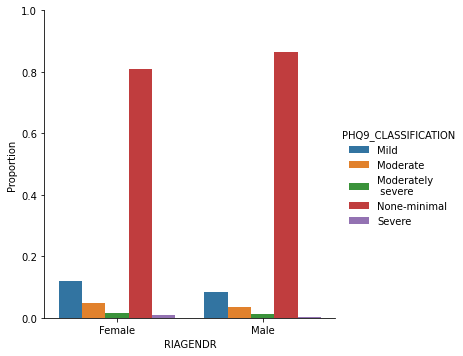

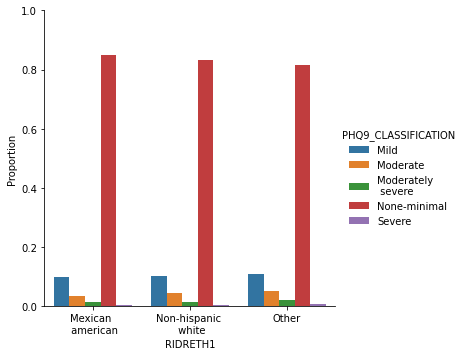

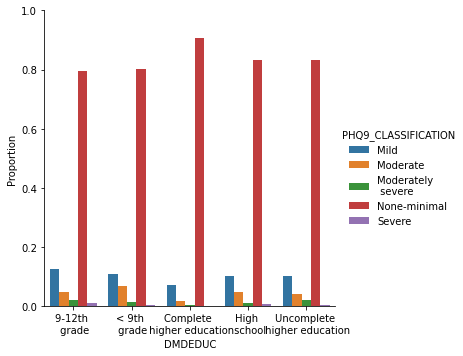

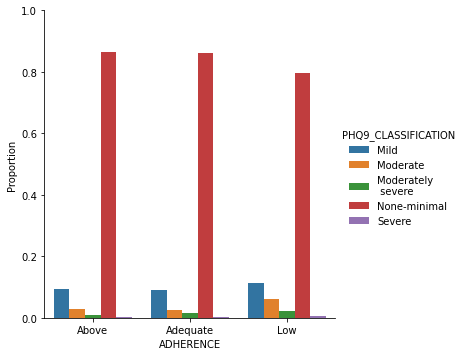

In [33]:
for var in categorical_variable:
    if var == 'PHQ9_CLASSIFICATION':
        continue

    bar_graph_grp(df1.replace(label_cat_var), var)

Notes:
- As previously mentioned, the group with none/minimal depression presents much higher results than the other groups, which makes assessment difficult due to the difference in magnitude.
- Women seem to have a higher proportion of individuals in the mild, moderate and severe depression categories.
- Ethnicity categories do not appear to have any effect on depression outcomes.
- The education level between 9-12º year have a higher proportion of individuals in the moderately severe and severe depression categories. 
- The education level of complete higher education have a higher proportion of people with none/minimal depression.
- The low adherence to physical activity have higher proportions of individuals in the categories of mild, moderate, moderately severe and severe depression.

Based on this assessment, we can describe the **general profile** of adult individuals with depressive symptoms in the USA during the period 2005-2006:
- They are predominantly women.
- The average age of those with moderate depression is 44, while for those with severe depression, it is 42.
- Annual family income tends to decrease as depression severity increases. The group with moderate depression has an annual family income between $20,000 and $24,999, whereas for the group with severe depression, it ranges between $15,000 and $19,999.
- They tend to have lower education levels, typically having completed 9th to 12th grade.
- They engage in less physical activity.
- People with severe depression appear to have a lower healthy eating index. They consume less fruit, whole grains, seafood, and vegetable proteins.
- They consume more refined grains and less added sugar.